### Neste script vamos analisar os dados de malha fundiária mais importantes para a Hidreletrica de Teles Pires

Vamos analisar os grandes números para Teles Pires  
Primeiro vamos ler os dados

In [1]:
#Importando pacotes
import pandas as pd
import numpy as np
import glob
from itables import show
import jenkspy
import seaborn as sns
from matplotlib import pyplot
pd.options.display.float_format = '{:20,.5f}'.format
usuario='User'

In [2]:
#Definindo nome de arquivos e diretórios:
dir_tables = 'C:/Users/'+usuario+'/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable/'

my_list_files = glob.glob(dir_tables+'*.csv')

malha = ['assentamento','CAR','FloraNaoDest','SIGEF','SNUC','TI']
my_list_files

['C:/Users/User/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable\\Assentamentos_SumOfValues_featureTable.csv',
 'C:/Users/User/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable\\CAR_SumOfValues_featureTable.csv',
 'C:/Users/User/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable\\FloraNaoDest_SumOfValues_featureTable.csv',
 'C:/Users/User/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable\\Sigef_SumOfValues_featureTable.csv',
 'C:/Users/User/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable\\SNUC_TelesPires_featureTable.csv',
 'C:/Users/User/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable\\TIHomolog_SumOfValues_featureTable.csv']

In [3]:
#Lendo os arquivos, alimentando  a lista de DFs e criando uma coluna com que tipo de malha é

pd_list = []
for i in range(len(my_list_files)):
    a = pd.read_csv(my_list_files[i],sep = ';')
    a['Malha'] = malha[i]
    pd_list.append(a)




## Agora vamos calcular os grandes números para cada malha fundiária!  
Nós sabemos que a analise de Teles Pires possui 66.846.626,00 milhões de dolares.

In [4]:
#Vamos passar a coluna de dolar por 1km² para number. Estava string
pd_list[0]['Dolar_1km2'] = pd_list[0]['Dolar_1km2'].str.replace(',','.').astype('float')
pd_list[1]['Dolar_1km2'] = pd_list[1]['Dolar_1km2'].str.replace(',','.').astype('float')
pd_list[2]['Dolar_1km2'] = pd_list[2]['Dolar_1km2'].str.replace(',','.').astype('float')
pd_list[3]['Dolar_1km2'] = pd_list[3]['Dolar_1km2'].str.replace(',','.').astype('float')
pd_list[4]['Dolar_1km2'] = pd_list[4]['Dolar_1km2'].str.replace(',','.').astype('float')
pd_list[5]['Dolar_1km2'] = pd_list[5]['Dolar_1km2'].str.replace(',','.').astype('float')


#Vamos passar a coluna de geometria para number. Estava string
pd_list[0]['area_geom'] = pd_list[0]['area_geom'].str.replace(',','.').astype('float')
pd_list[1]['area_geom'] = pd_list[1]['area_geom'].str.replace(',','.').astype('float')
pd_list[2]['area_geom'] = pd_list[2]['area_geom'].str.replace(',','.').astype('float')
pd_list[3]['area_geom'] = pd_list[3]['area_geom'].str.replace(',','.').astype('float')
pd_list[4]['area_geom'] = pd_list[4]['area_geom'].str.replace(',','.').astype('float')
pd_list[5]['area_geom'] = pd_list[5]['area_geom'].str.replace(',','.').astype('float')


#Vamos passar a coluna de Toda Soma de dolar pra área toda do pixel  para number tbm
pd_list[0]['DolarPixel'] = pd_list[0]['DolarPixel'].str.replace(',','.').astype('float')
pd_list[1]['DolarPixel'] = pd_list[1]['DolarPixel'].str.replace(',','.').astype('float')
pd_list[2]['DolarPixel'] = pd_list[2]['DolarPixel'].str.replace(',','.').astype('float')
pd_list[3]['DolarPixel'] = pd_list[3]['DolarPixel'].str.replace(',','.').astype('float')
pd_list[4]['DolarPixel'] = pd_list[4]['DolarPixel'].str.replace(',','.').astype('float')
pd_list[5]['DolarPixel'] = pd_list[5]['DolarPixel'].str.replace(',','.').astype('float')


In [5]:
#Vamos agora calcular o valor de soma das áreas e criar uma coluna para dividir pela total de Teles Pires
malha_fundi = ['assentamento','CAR','FloraNaoDest','SIGEF','SNUC','TI','Vazio Fundiário']
nome_col = 'DolarPixel'

assentamento_dolar = pd_list[0][nome_col].sum()
CAR_dolar = pd_list[1][nome_col].sum()
FloraNaoDest_dolar = pd_list[2][nome_col].sum()
SIGEF_dolar = pd_list[3][nome_col].sum()
SNUC_dolar = pd_list[4][nome_col].sum()
TI_dolar = pd_list[5][nome_col].sum()
vazio_fundi=535691236.308228
malha_dol = [assentamento_dolar,CAR_dolar,FloraNaoDest_dolar,SIGEF_dolar,SNUC_dolar,TI_dolar,vazio_fundi]

assentamento_dolar_pctagem=(assentamento_dolar/3780055263.8189197)*100
CAR_dolar_pctagem=(CAR_dolar/3780055263.8189197)*100
FloraNaoDest_dolar_pctagem=(FloraNaoDest_dolar/3780055263.8189197)*100
SIGEF_dolar_pctagem=(SIGEF_dolar/3780055263.8189197)*100
SNUC_dolar_pctagem=(SNUC_dolar/3780055263.8189197)*100  
TI_dolar_pctagem=(TI_dolar/3780055263.8189197)*100
Vazio_dolar_pctagem = (vazio_fundi/3780055263.8189197)*100
malha_dol_peloTotal = [assentamento_dolar_pctagem,CAR_dolar_pctagem,FloraNaoDest_dolar_pctagem,SIGEF_dolar_pctagem,
                      SNUC_dolar_pctagem,TI_dolar_pctagem,Vazio_dolar_pctagem]


df_final =pd.DataFrame({'Malha Fundiária':malha_fundi,'DolarPorMalhaFundiária':malha_dol,"Porcentagem,dolarizada, da malha para Total de TelesPires":malha_dol_peloTotal})
df_final.attrs['Valores Obtidos do Dolar'] = 'A Obtenção foi feita pela multiplicação da soma de valores da interpolação dentro de cada malha fundiária. Este valor da soma esta para 1km², portanto, multiplicamos esse valor por 53,670276 que é a área do pixel da interpolação '
df_final.attrs['Valor Total para Teles Pires'] ='3.780.055.263,8189197 de dols'
df_final.attrs['Porcentagem que cada Malha influencia no total de teles pires'] ='Calculo feito a partir do que cada malha tem dolarizado dividido por 3.780.055.263,8189197 de dols e multiplicado por 100'
df_final.attrs['Vazio fundiário']= 'Foi criado a partir dos pixels de Teles Pires (interpolação) que não tem sobreposição com nenhuma malha fundiária'

show(df_final)


In [6]:
df_final.attrs

{'Valores Obtidos do Dolar': 'A Obtenção foi feita pela multiplicação da soma de valores da interpolação dentro de cada malha fundiária. Este valor da soma esta para 1km², portanto, multiplicamos esse valor por 53,670276 que é a área do pixel da interpolação ',
 'Valor Total para Teles Pires': '3.780.055.263,8189197 de dols',
 'Porcentagem que cada Malha influencia no total de teles pires': 'Calculo feito a partir do que cada malha tem dolarizado dividido por 3.780.055.263,8189197 de dols e multiplicado por 100',
 'Vazio fundiário': 'Foi criado a partir dos pixels de Teles Pires (interpolação) que não tem sobreposição com nenhuma malha fundiária'}

### Analisando a perda de dolar por ano
aqui vamos pegar o excel do spatial Join

In [7]:
#Lendo os arquivos dos spatial join de alerta por dolar de teles pires
diretorio = "C:/Users/"+usuario+"/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable/Dolar_PorAlerta/"
files = glob.glob(diretorio+'*.csv')
files_alertas_teles = []
for i in range(len(files)):
    files_alertas_teles.append(pd.read_csv(files[i],sep=';'))
all_desmat_dol = pd.concat(files_alertas_teles,ignore_index = True)
all_desmat_dol.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193213 entries, 0 to 193212
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OID_        193213 non-null  int64 
 1   Join_Count  193213 non-null  int64 
 2   TARGET_FID  193213 non-null  int64 
 3   fid_1       193213 non-null  int64 
 4   state       193213 non-null  object
 5   path_row    193213 non-null  int64 
 6   main_class  193213 non-null  object
 7   class_name  193213 non-null  object
 8   def_cloud   193213 non-null  object
 9   julian_day  193213 non-null  object
 10  image_date  193213 non-null  object
 11  year        193213 non-null  object
 12  area_km     193213 non-null  object
 13  scene_id    193213 non-null  object
 14  source      193213 non-null  object
 15  satellite   193213 non-null  object
 16  sensor      193213 non-null  object
 17  areaDesmat  193213 non-null  object
 18  Id          193213 non-null  int64 
 19  gridcode    193213 non-

In [8]:
#Transformando as colunas de numero em numeric
all_desmat_dol['year'] = all_desmat_dol['year'].str.replace(',','.').astype('float')
all_desmat_dol['areaDesmat'] = all_desmat_dol['areaDesmat'].str.replace(',','.').astype('float')


In [9]:
all_desmat_dol['AreaDesmatadaDolarizada'] = all_desmat_dol['areaDesmat']*all_desmat_dol['gridcode']
all_desmat_dol.AreaDesmatadaDolarizada.sum()

46196196.19973099

In [10]:
#Lendo os arquivos de Desmatamento dentro de cada malha fundiária
assentamento_alerta = pd.read_csv("C:/Users/" + usuario+"/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable/AlertaPorMalha/Alerta_Assentamento_teles_filter.csv",
 sep=';')

car_alerta = pd.read_csv("C:/Users/" + usuario+"/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable/AlertaPorMalha/Alerta_CAR_teles_filter.csv",
 sep=';')

flora_alerta = pd.read_csv("C:/Users/" + usuario+"/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable/AlertaPorMalha/Alerta_Flora_teles_filter.csv",
 sep=';')

SIGEF_alerta =  pd.read_csv("C:/Users/" + usuario+"/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable/AlertaPorMalha/Alerta_SIGEF_teles_filter.csv",
 sep=';')

SNUC_alerta =  pd.read_csv("C:/Users/" + usuario+"/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable/AlertaPorMalha/Alerta_SNUC_teles_filter.csv",
 sep=';')

TI_alerta = pd.read_csv("C:/Users/" + usuario+"/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/FeaturesTable/AlertaPorMalha/Alerta_TI_teles_filter.csv",
 sep=';')


In [11]:
desmat_dolarizado_assentamento = all_desmat_dol[all_desmat_dol['fid_1'].isin(assentamento_alerta.fid_1.unique())]
desmat_dolarizado_car =  all_desmat_dol[all_desmat_dol['fid_1'].isin(car_alerta.fid_1)]
desmat_dolarizado_flora =  all_desmat_dol[all_desmat_dol['fid_1'].isin(flora_alerta.fid_1)]
desmat_dolarizado_SIGEF =  all_desmat_dol[all_desmat_dol['fid_1'].isin(SIGEF_alerta.fid_1)]
desmat_dolarizado_SNUC =  all_desmat_dol[all_desmat_dol['fid_1'].isin(SNUC_alerta.fid_1)]
desmat_dolarizado_TI =  all_desmat_dol[all_desmat_dol['fid_1'].isin(TI_alerta.fid_1)]


#Criando colunas de Malha
desmat_dolarizado_assentamento['Malha']='Assentamento'
desmat_dolarizado_car['Malha']='CAR'
desmat_dolarizado_flora['Malha']='Floresta Ñ Destinada'
desmat_dolarizado_SIGEF['Malha']='SIGEF'
desmat_dolarizado_SNUC['Malha']='SNUC'
desmat_dolarizado_TI['Malha']='Terra Indigena'

C:\Users\User\AppData\Local\Temp\ipykernel_21384\3324183874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desmat_dolarizado_assentamento['Malha']='Assentamento'
C:\Users\User\AppData\Local\Temp\ipykernel_21384\3324183874.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desmat_dolarizado_car['Malha']='CAR'
C:\Users\User\AppData\Local\Temp\ipykernel_21384\3324183874.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [12]:
#Criando o Desmatamento para o vazio:

import itertools
list_fid = list(itertools.chain(desmat_dolarizado_assentamento.fid_1,
                          desmat_dolarizado_car.fid_1, 
                          desmat_dolarizado_flora.fid_1,
                          desmat_dolarizado_SIGEF.fid_1,
                          desmat_dolarizado_SNUC.fid_1,
                          desmat_dolarizado_TI.fid_1))
vazio_dol = all_desmat_dol[~all_desmat_dol['fid_1'].isin(list_fid)]

vazio_dol['Malha']='Vazio Fundiário'
vazio_dol

C:\Users\User\AppData\Local\Temp\ipykernel_21384\1520947973.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazio_dol['Malha']='Vazio Fundiário'


,OID_,Join_Count,TARGET_FID,fid_1,state,path_row,main_class,class_name,def_cloud,julian_day,...,area_km,scene_id,source,satellite,sensor,areaDesmat,Id,gridcode,AreaDesmatadaDolarizada,Malha
8,8,1,8,598,PA,22762,DESMATAMENTO,d2015,"2013,000000000000000","226,000000000000000",...,"0,005561253406668","2571,000000000000000",,,,0.00556,8119,332,1.84634,Vazio Fundiário
15,15,1,15,28569,PA,22562,DESMATAMENTO,d2015,"0,000000000000000","196,000000000000000",...,"0,000076942260949","2573,000000000000000",,,,0.00008,9337,1566,0.12049,Vazio Fundiário
19,19,1,19,1241,PA,22661,DESMATAMENTO,d2015,"0,000000000000000","235,000000000000000",...,"0,000047134145359","2585,000000000000000",,,,0.00005,3124,279,0.01315,Vazio Fundiário
20,20,1,20,1252,PA,22463,DESMATAMENTO,d2015,"0,000000000000000","253,000000000000000",...,"0,000073182922551","2574,000000000000000",,,,0.00007,12043,2188,0.16012,Vazio Fundiário
22,22,1,22,1303,PA,22563,DESMATAMENTO,d2015,"0,000000000000000","196,000000000000000",...,"0,000524089665818","2542,000000000000000",,,,0.00052,12264,2344,1.22847,Vazio Fundiário
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192876,26187,1,26187,675076,PA,22863,DESMATAMENTO,d2022,"0,000000000000000","244,000000000000000",...,"0,083413639285178","1470,000000000000000",Amazonia,Landsat,OLI,0.08341,10902,272,22.68850,Vazio Fundiário
193016,26327,1,26327,675501,PA,22865,DESMATAMENTO,d2022,"0,000000000000000","228,000000000000000",...,"0,057670374412041","1461,000000000000000",Amazonia,Landsat,OLI,0.05767,20096,2561,147.69379,Vazio Fundiário
193022,26333,1,26333,675460,PA,22865,DESMATAMENTO,d2022,"0,000000000000000","228,000000000000000",...,"0,012735324746316","1461,000000000000000",Amazonia,Landsat,OLI,0.01274,20314,1714,21.82835,Vazio Fundiário
193101,26412,1,26412,675652,PA,22865,DESMATAMENTO,d2022,"0,000000000000000","236,000000000000000",...,"0,046727170361489","1460,000000000000000",Amazonia,Landsat,OLI,0.04673,19861,2557,119.48135,Vazio Fundiário


In [13]:
pd_desmatamento_Malha = pd.concat([desmat_dolarizado_assentamento,desmat_dolarizado_car,
                                  desmat_dolarizado_flora,desmat_dolarizado_SIGEF,desmat_dolarizado_SNUC,
                                  desmat_dolarizado_TI,vazio_dol],ignore_index=True)


pd_desmatamento_Malha[pd_desmatamento_Malha['Malha']=="Vazio Fundiário"].gridcode.sum()
#7.729.634
75060903

75060903

# Criando a planilha final

In [14]:
show(df_final)
df_final.attrs



{'Valores Obtidos do Dolar': 'A Obtenção foi feita pela multiplicação da soma de valores da interpolação dentro de cada malha fundiária. Este valor da soma esta para 1km², portanto, multiplicamos esse valor por 53,670276 que é a área do pixel da interpolação ',
 'Valor Total para Teles Pires': '3.780.055.263,8189197 de dols',
 'Porcentagem que cada Malha influencia no total de teles pires': 'Calculo feito a partir do que cada malha tem dolarizado dividido por 3.780.055.263,8189197 de dols e multiplicado por 100',
 'Vazio fundiário': 'Foi criado a partir dos pixels de Teles Pires (interpolação) que não tem sobreposição com nenhuma malha fundiária'}

In [15]:
#Criando valores de soma cumulativa
sigef = pd_desmatamento_Malha.query('Malha=="SIGEF"')
sigef_ano = sigef.groupby('year',as_index=False).AreaDesmatadaDolarizada.sum()
sigef_ano['Cumulative Dolar'] = sigef_ano.AreaDesmatadaDolarizada.cumsum()
sigef_ano['Malha']='SIGEF'
sigef_ano = sigef_ano[['year','Malha','Cumulative Dolar']]
sigef_ano['pct'] = sigef_ano['Cumulative Dolar'] / sigef_ano['Cumulative Dolar'].max()


TI= pd_desmatamento_Malha.query('Malha=="Terra Indigena"')
TI_ano = TI.groupby('year',as_index=False).AreaDesmatadaDolarizada.sum()
TI_ano['Cumulative Dolar'] = TI_ano.AreaDesmatadaDolarizada.cumsum()
TI_ano['Malha']='Terra Indigena'
TI_ano = TI_ano[['year','Malha','Cumulative Dolar']]
TI_ano['pct'] = TI_ano['Cumulative Dolar'] / TI_ano['Cumulative Dolar'].max()

flora = pd_desmatamento_Malha.query('Malha=="Floresta Ñ Destinada"')
flora = flora.groupby('year',as_index=False).AreaDesmatadaDolarizada.sum()
flora['Cumulative Dolar'] = flora.AreaDesmatadaDolarizada.cumsum()
flora['Malha']='Floresta Ñ Destinada'
flora = flora[['year','Malha','Cumulative Dolar']]
flora['pct'] = flora['Cumulative Dolar'] / flora['Cumulative Dolar'].max()

SNUC = pd_desmatamento_Malha.query('Malha=="SNUC"')
SNUC = SNUC.groupby('year',as_index=False).AreaDesmatadaDolarizada.sum()
SNUC['Cumulative Dolar'] = SNUC.AreaDesmatadaDolarizada.cumsum()
SNUC['Malha']='SNUC'
SNUC = SNUC[['year','Malha','Cumulative Dolar']]
SNUC['pct'] = SNUC['Cumulative Dolar'] / SNUC['Cumulative Dolar'].max()

vazio = pd_desmatamento_Malha.query('Malha=="Vazio Fundiário"')
vazio = vazio.groupby('year',as_index=False).AreaDesmatadaDolarizada.sum()
vazio['Cumulative Dolar'] = vazio.AreaDesmatadaDolarizada.cumsum()
vazio['Malha']='Vazio Fundiário'
vazio = vazio[['year','Malha','Cumulative Dolar']]
vazio['pct'] = vazio['Cumulative Dolar'] / vazio['Cumulative Dolar'].max()

CAR = pd_desmatamento_Malha.query('Malha=="CAR"')
CAR = CAR.groupby('year',as_index=False).AreaDesmatadaDolarizada.sum()
CAR['Cumulative Dolar'] = CAR.AreaDesmatadaDolarizada.cumsum()
CAR['Malha']='CAR'
CAR = CAR[['year','Malha','Cumulative Dolar']]
CAR['pct'] = CAR['Cumulative Dolar'] / CAR['Cumulative Dolar'].max()

assentamento = pd_desmatamento_Malha.query('Malha=="Assentamento"')
assentamento = assentamento.groupby('year',as_index=False).AreaDesmatadaDolarizada.sum()
assentamento['Cumulative Dolar'] = assentamento.AreaDesmatadaDolarizada.cumsum()
assentamento['Malha']='Assentamento'
assentamento = assentamento[['year','Malha','Cumulative Dolar']]
assentamento['pct'] = assentamento['Cumulative Dolar'] / assentamento['Cumulative Dolar'].max()

df_cumulative = pd.concat([sigef_ano,TI_ano,flora,SNUC,vazio,CAR,assentamento],ignore_index = True)
df_cumulative

,year,Malha,Cumulative Dolar,pct
0,"2,015.00000",SIGEF,"934,678.40317",0.09360
1,"2,016.00000",SIGEF,"1,935,114.86227",0.19379
2,"2,017.00000",SIGEF,"2,983,535.95224",0.29878
3,"2,018.00000",SIGEF,"3,965,757.12264",0.39714
4,"2,019.00000",SIGEF,"5,655,164.95865",0.56633
5,"2,020.00000",SIGEF,"7,258,334.54633",0.72688
6,"2,021.00000",SIGEF,"8,729,864.01724",0.87424
7,"2,022.00000",SIGEF,"9,985,669.78851",1.00000
8,"2,015.00000",Terra Indigena,"58,073.69844",0.03517
9,"2,016.00000",Terra Indigena,"138,046.70615",0.08359


<AxesSubplot: xlabel='year', ylabel='Cumulative Dolar'>

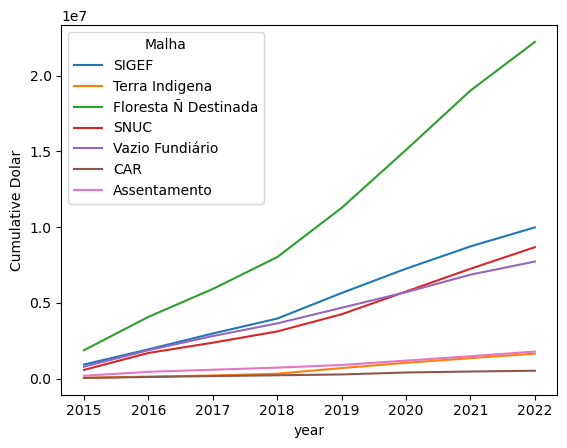

In [21]:
sns.lineplot(df_cumulative,x='year',y ='Cumulative Dolar',hue='Malha' )

<AxesSubplot: xlabel='year', ylabel='AreaDesmatadaDolarizada'>

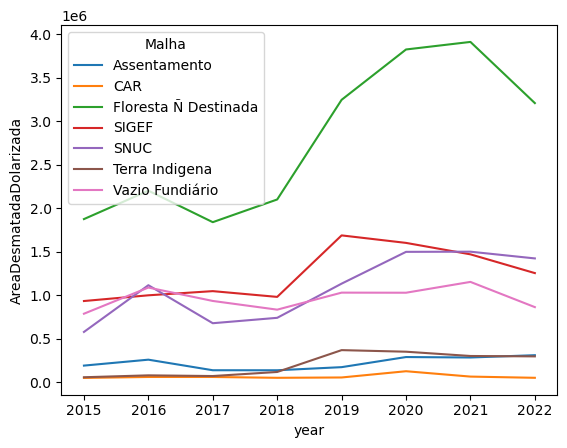

In [19]:

sns.lineplot(pd_desmatamento_Malha.groupby(['Malha','year'],as_index=False).AreaDesmatadaDolarizada.sum(),x='year',y ='AreaDesmatadaDolarizada',hue='Malha' )